In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4621 - accuracy: 0.8334
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3000 - accuracy: 0.8909
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2516 - accuracy: 0.9077
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2191 - accuracy: 0.9178
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1931 - accuracy: 0.9277
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1716 - accuracy: 0.9371
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1513 - accuracy: 0.9436
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1323 - accuracy: 0.9507
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1181 - accuracy: 0.9555
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [20]:


# Define category labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



1/1 [==============================] - 0s 35ms/step


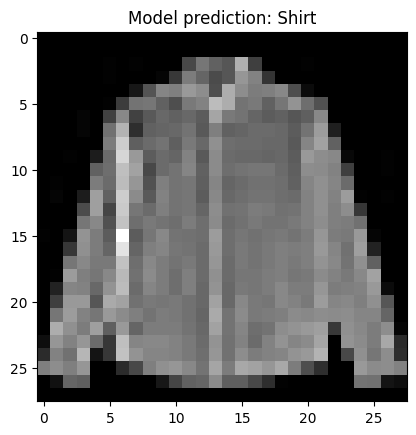

In [21]:
idx = np.random.randint(0, X_test.shape[0])
img = X_test[idx]

# Generate a prediction for the image
pred = model.predict(img.reshape(-1, 28, 28, 1))
pred_label = labels[np.argmax(pred)]

# Display the image and the prediction
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Model prediction: {pred_label}")
plt.show()